In [1]:
# Import libraries and dependencies
import pyfolio as pf
import json
import numpy as np
import yfinance as yf
import pandas as pd
import datetime as to_pydatetime
from pathlib import Path
import seaborn as sns
from MCForecastTools import MCSimulation
#import alpaca_trade_api as tradeapi


%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')


/Users/ritathomas/opt/anaconda3/lib/python3.9/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
#Pyfolio was selected as a library to analyise the the strategy for our client.  Pyfolio is a state of the art portfolio and risk analytics.
#Open source and free:  Apache v2 licensed
#Can be used:
#Standalone, with zipline, on Quantopian in hosted Research Environment and with PyThalesians

# Tearsheets analysis package provides the following visualizations
# Daily returns of a stock, or trading strategy
# Positions
# Transactions
# Period of market stress
# Bayesian risk analysis



In [3]:

# Set the start and end date
# start_date = '2002-09-30'
# end_date = '2022-09-30'

In [4]:
# Analalysis of past performance for each stock and back tested each of these stocks 

spy = yf.Ticker ('SPY')

In [5]:
print (spy)

yfinance.Ticker object <SPY>


In [6]:
spy_hist = spy.history('max')
spy_hist.head()

Open       High        Low      Close   Volume  Dividends  \
Date                                                                         
1993-01-29  25.352051  25.352051  25.225921  25.334032  1003200        0.0   
1993-02-01  25.352047  25.514214  25.352047  25.514214   480500        0.0   
1993-02-02  25.496198  25.586290  25.442142  25.568272   201300        0.0   
1993-02-03  25.604314  25.856573  25.586295  25.838554   529400        0.0   
1993-02-04  25.928635  26.000709  25.640339  25.946653   531500        0.0   

            Stock Splits  
Date                      
1993-01-29             0  
1993-02-01             0  
1993-02-02             0  
1993-02-03             0  
1993-02-04             0

In [7]:
spy_hist.index=spy_hist.index.tz_localize('utc')

In [8]:
spy_rets = spy_hist.Close.pct_change()
spy_rets = spy_rets.dropna()
spy_rets.head()

Date
1993-02-01 00:00:00+00:00    0.007112
1993-02-02 00:00:00+00:00    0.002119
1993-02-03 00:00:00+00:00    0.010571
1993-02-04 00:00:00+00:00    0.004184
1993-02-05 00:00:00+00:00   -0.000694
Name: Close, dtype: float64

In [9]:
# We will need to period 
#Sharpe ratio of 1 or near 1 or 2, 3 is a great sharpe ratio - not a high risk 
# Higher sharpe ratio's are limited set of perameters 


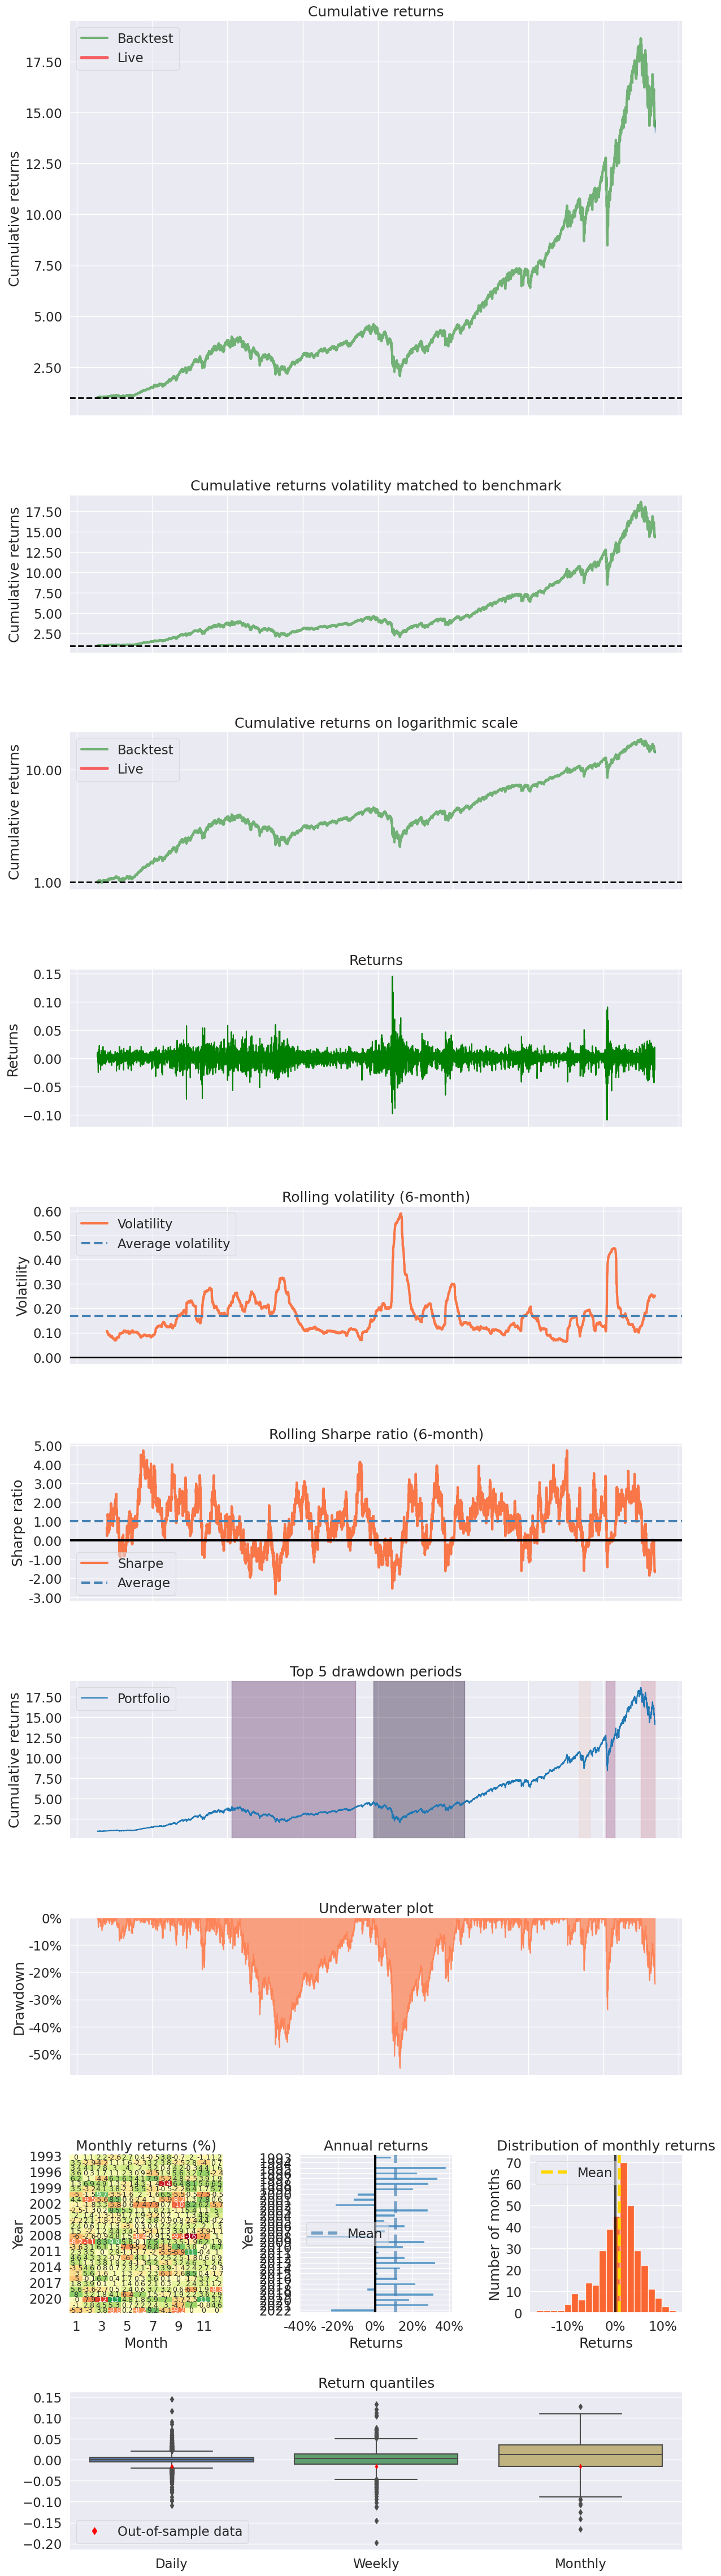

In [10]:
pf.create_returns_tear_sheet(spy_rets,live_start_date='2022-09-30')

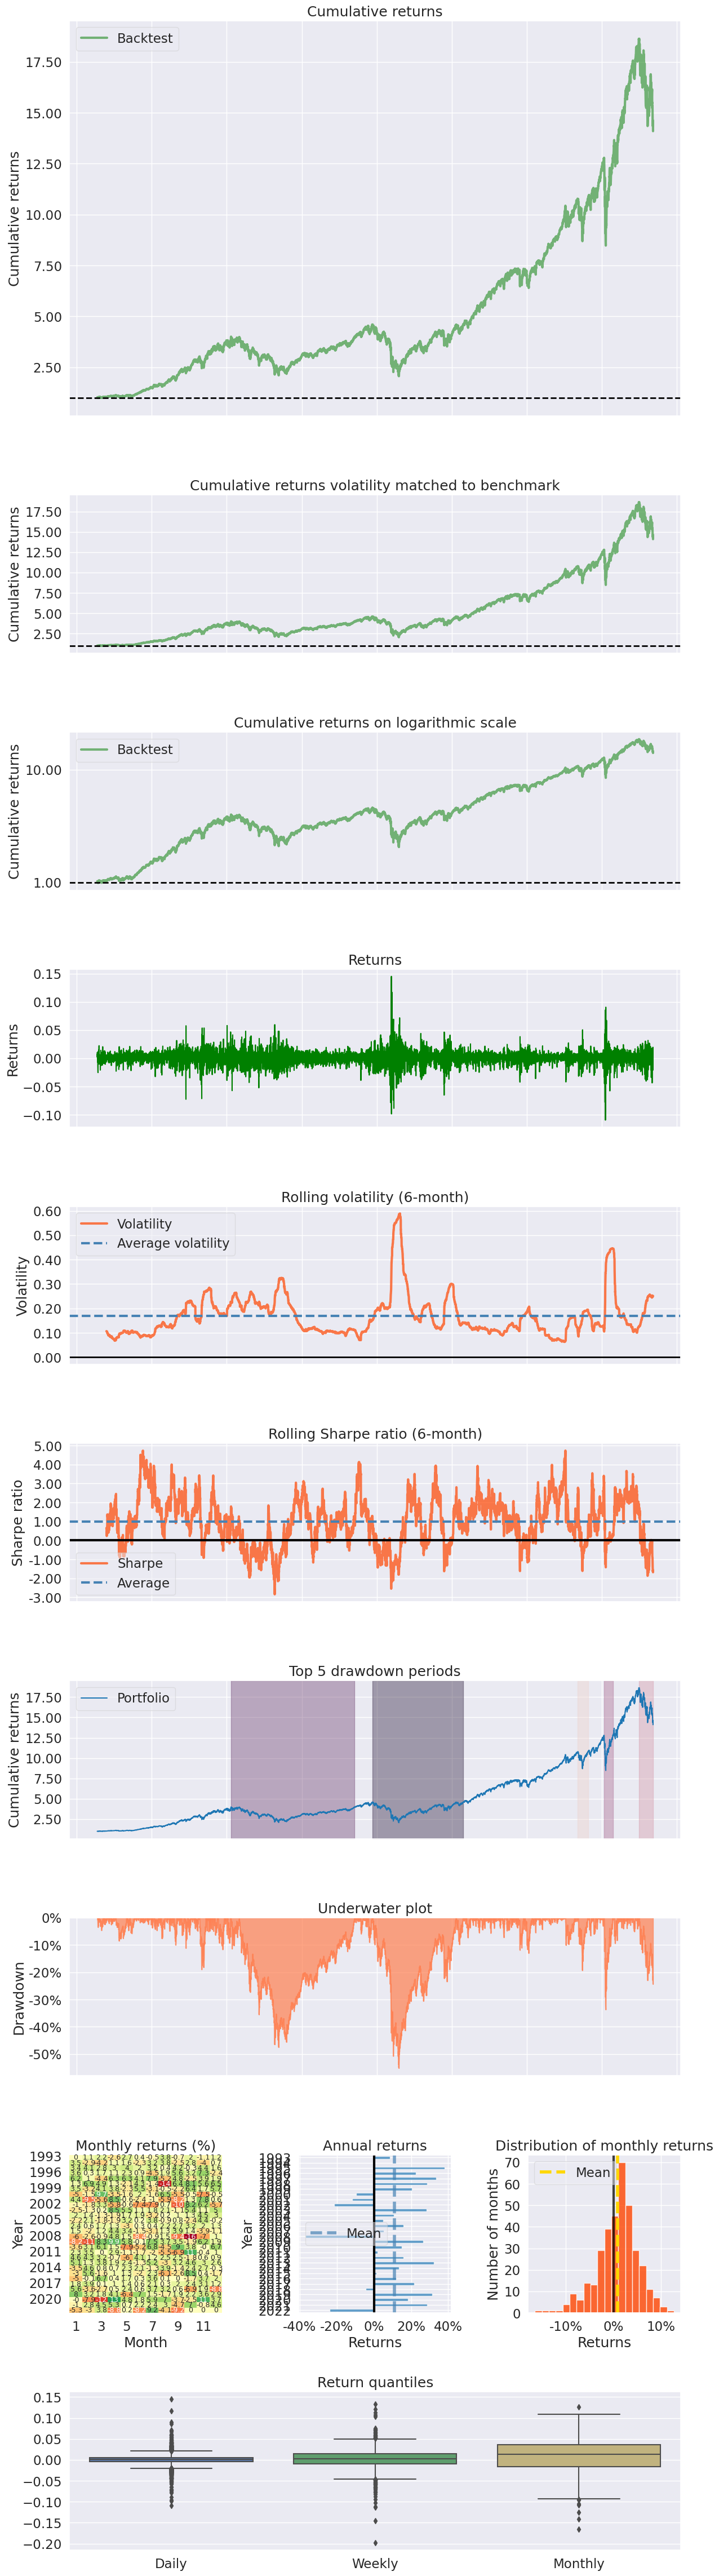

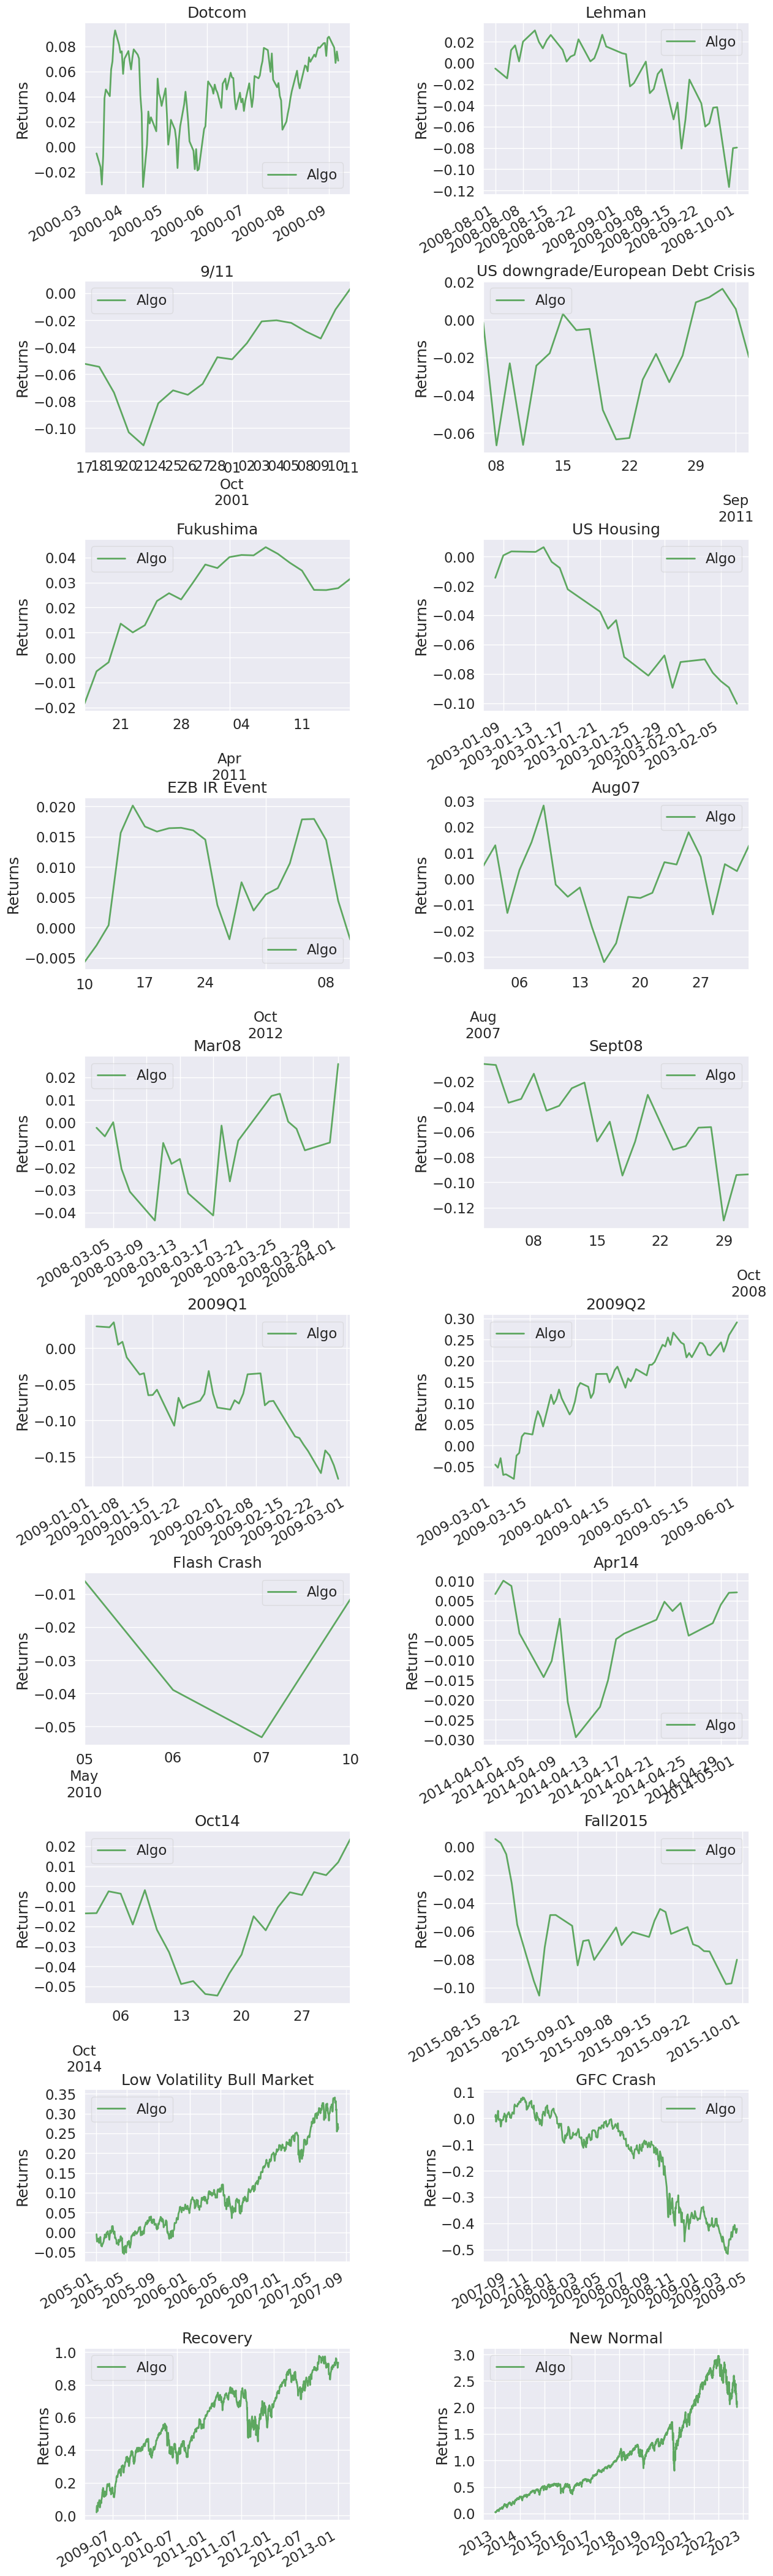

In [11]:
# The full tear sheet presents a selection of new tables and charts.  
# 5 worst drawdowns, with information as to peak/valley date and duration.
# Top 5 drawdown periods visualised on to of the cumulative returns.
# A simple plot showing the daily returns over time
# A selection of plots summarising the strategy's returns by breaking them down into: monthly returns(seperately per each year), annual returns, a histogram presenting the distribution of monthly returns and quantiles of returns expressed in different frequencies.

pf.create_full_tear_sheet(spy_rets)

In [13]:
ndx = yf.Ticker ('^NDX')

In [13]:
ndx = yf.Ticker ('^NDX')

In [14]:
ndx_hist = ndx.history('max')
ndx_hist.head()

Open        High         Low       Close     Volume  \
Date                                                                    
1985-10-01  110.620003  112.160004  110.565002  112.139999  153160000   
1985-10-02  112.139999  112.540001  110.779999  110.824997  164640000   
1985-10-03  110.839996  111.184998  110.120003  110.870003  147300000   
1985-10-04  110.870003  110.870003  109.855003  110.074997  147900000   
1985-10-07  110.074997  110.135002  108.175003  108.199997  128640000   

            Dividends  Stock Splits  
Date                                 
1985-10-01          0             0  
1985-10-02          0             0  
1985-10-03          0             0  
1985-10-04          0             0  
1985-10-07          0             0

In [15]:
ndx_hist.index = ndx_hist.index.tz_localize('utc')

In [16]:
ndx_rets = ndx_hist.Close.pct_change()
ndx_rets = ndx_rets.dropna()
ndx_rets.head()

Date
1985-10-02 00:00:00+00:00   -0.011726
1985-10-03 00:00:00+00:00    0.000406
1985-10-04 00:00:00+00:00   -0.007171
1985-10-07 00:00:00+00:00   -0.017034
1985-10-08 00:00:00+00:00   -0.009612
Name: Close, dtype: float64

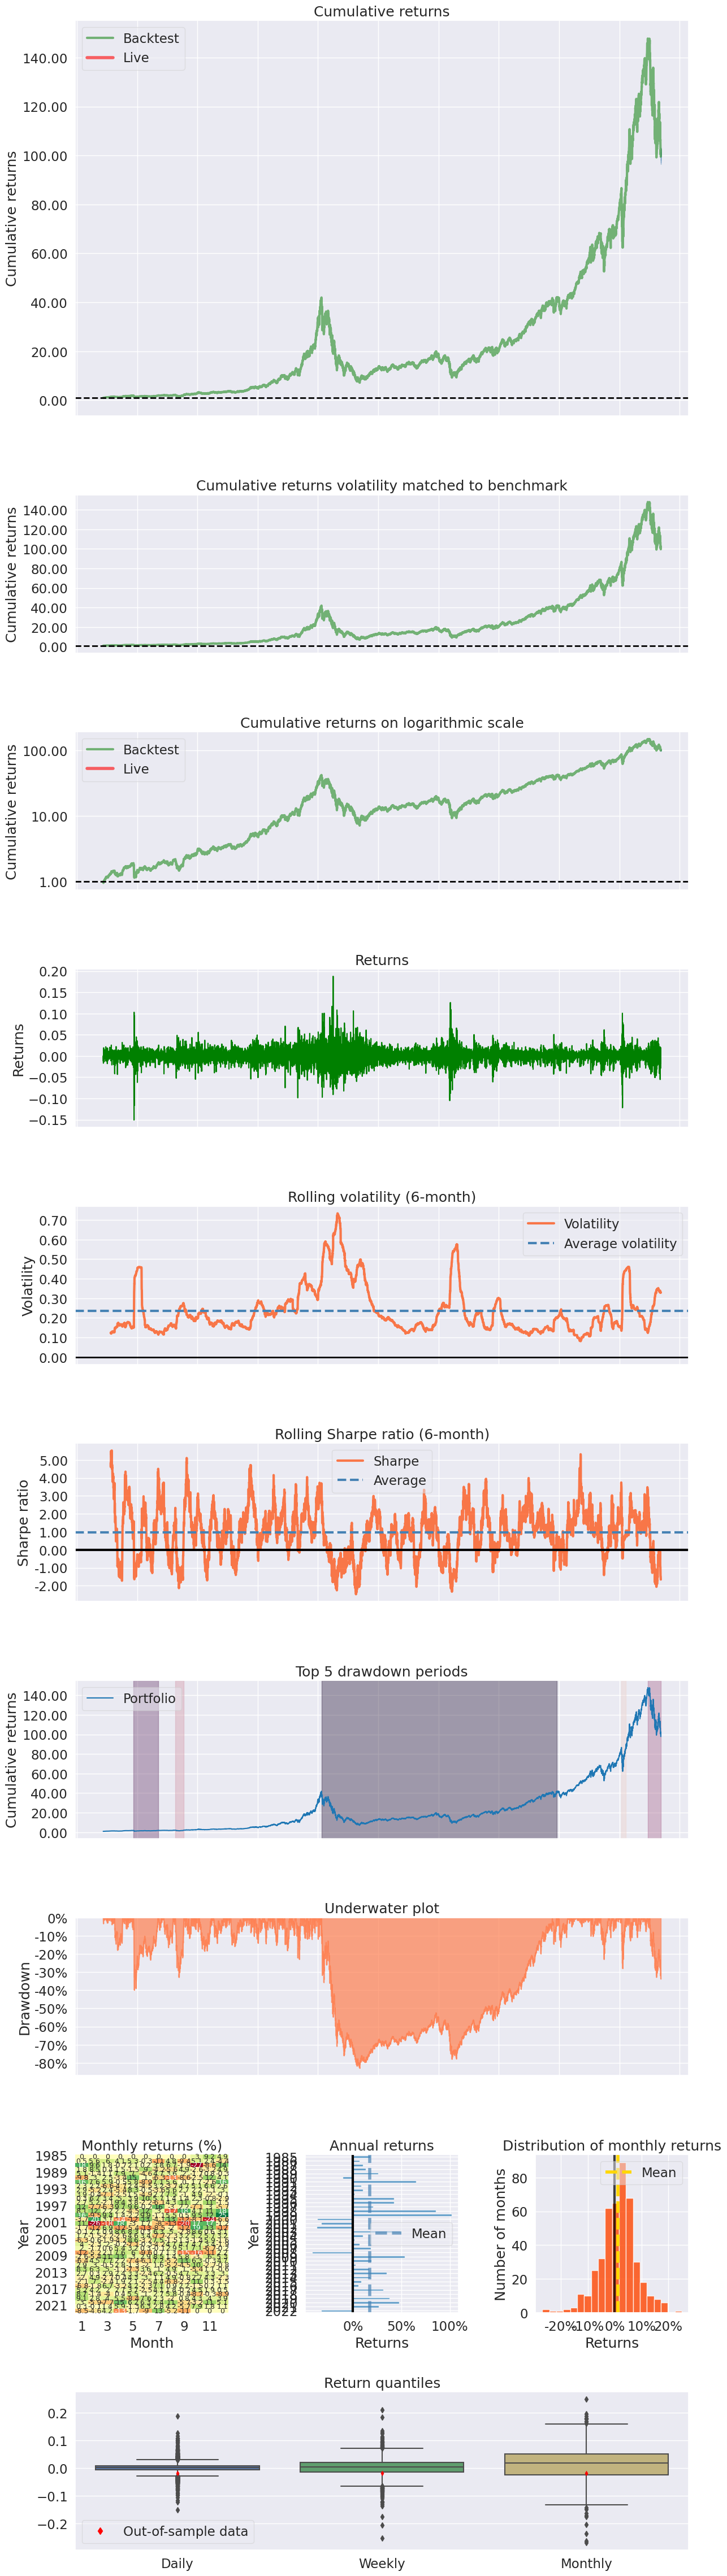

In [17]:
pf.create_returns_tear_sheet(ndx_rets,live_start_date='2022-09-30')

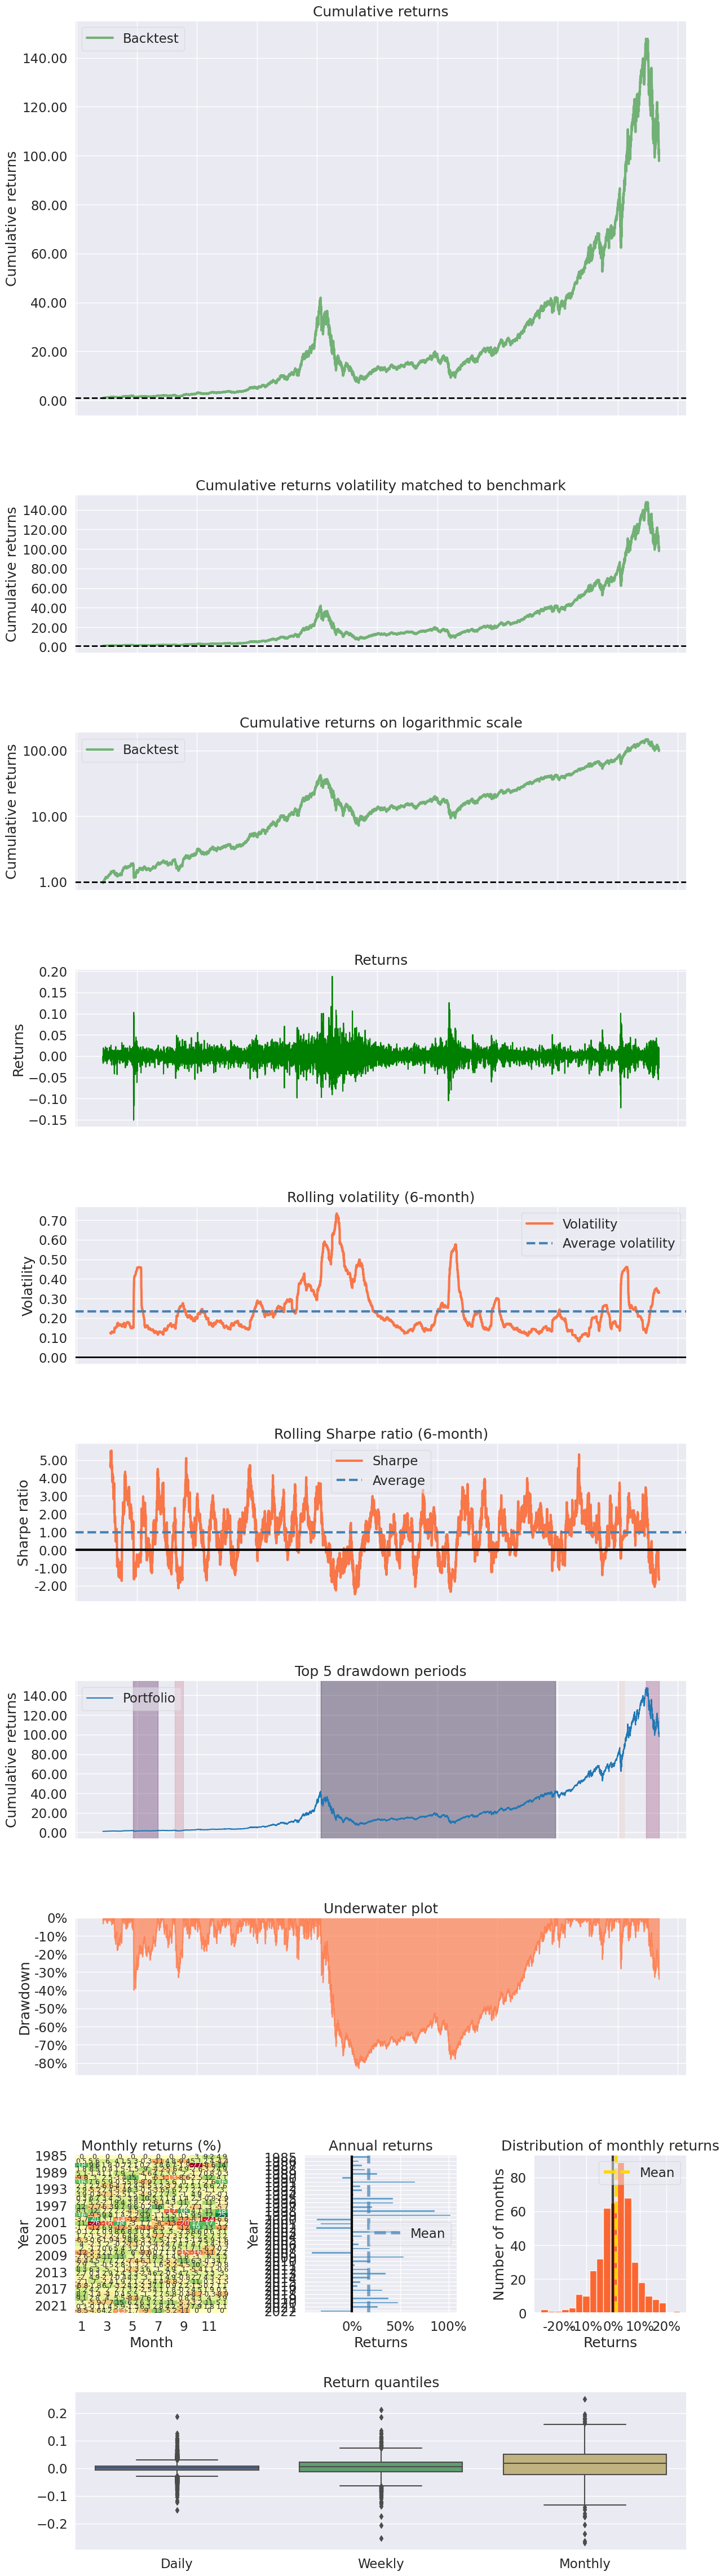

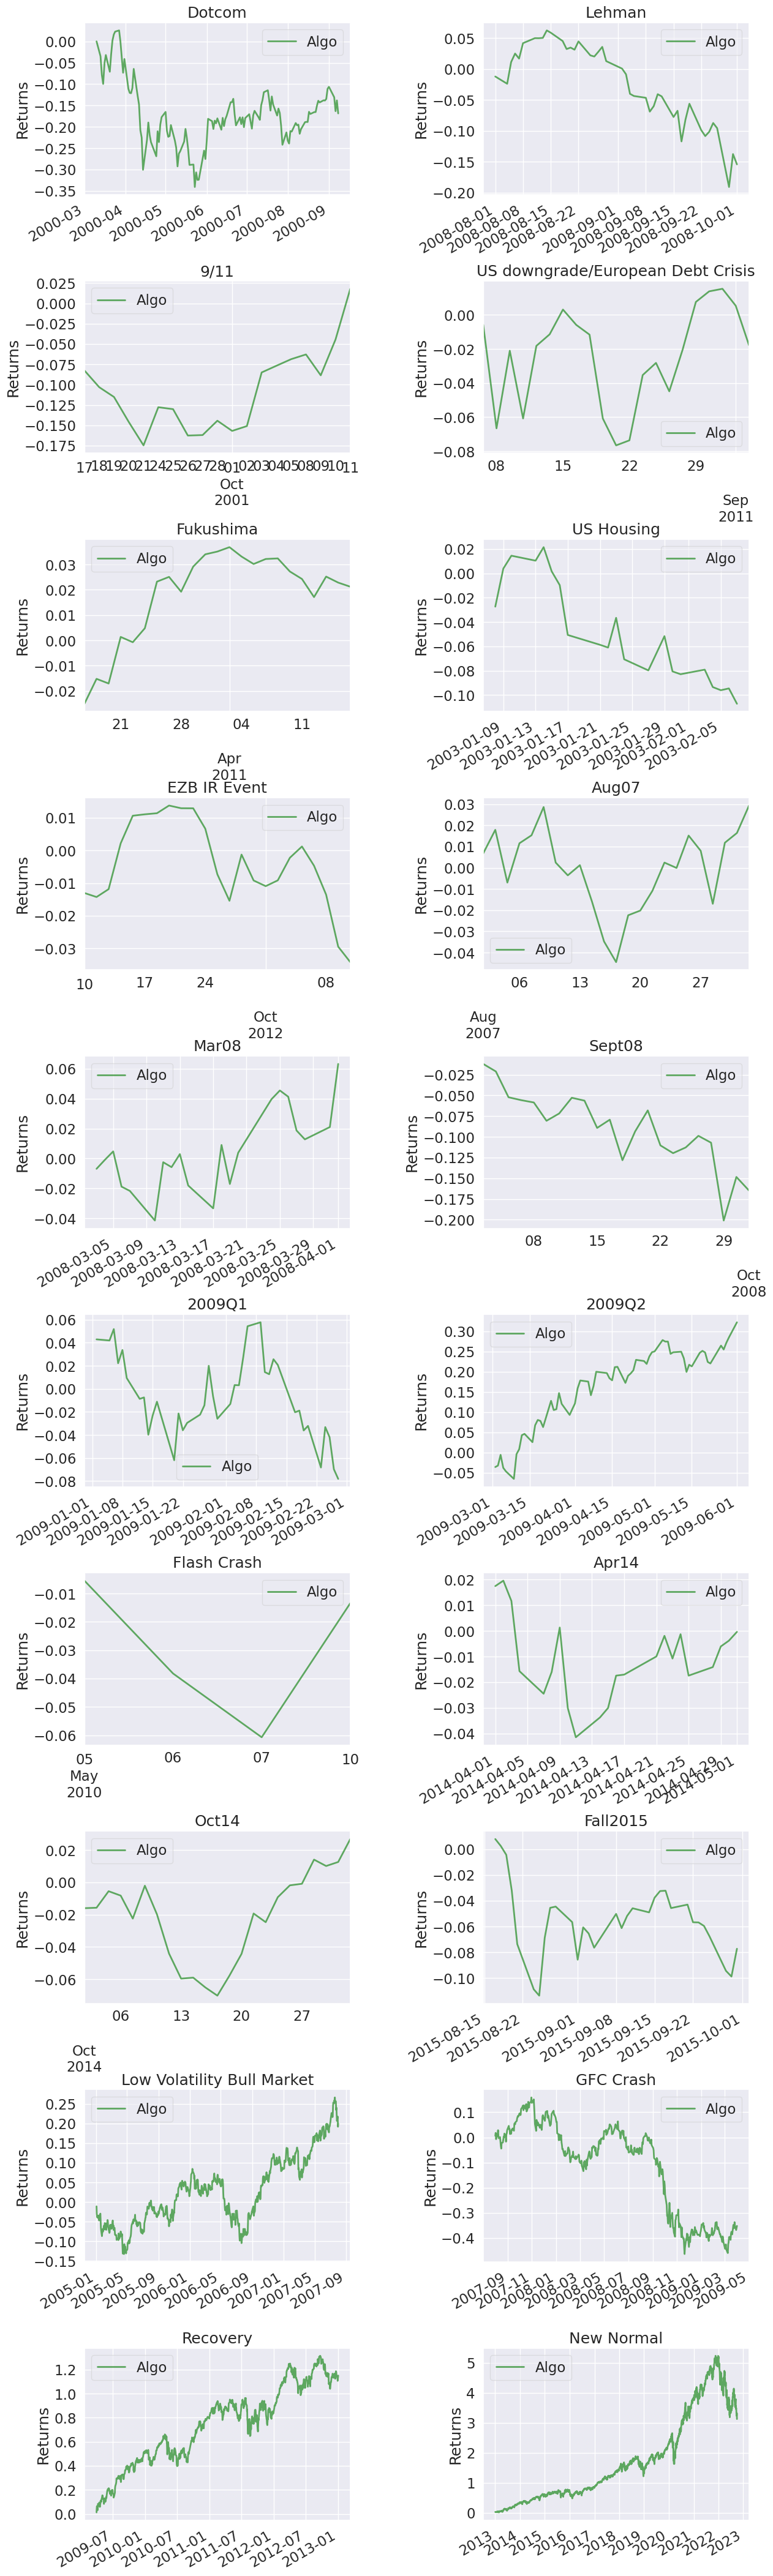

In [18]:
pf.create_full_tear_sheet(ndx_rets)

In [19]:
# 30 year US Treasury Bond yield  
bond = yf.Ticker ('^TYX')

In [20]:
bond_hist = bond.history('max')
bond_hist.head()

Open  High   Low  Close  Volume  Dividends  Stock Splits
Date                                                                
1977-02-15  7.70  7.70  7.70   7.70       0          0             0
1977-02-16  7.67  7.67  7.67   7.67       0          0             0
1977-02-17  7.67  7.67  7.67   7.67       0          0             0
1977-02-18  7.76  7.76  7.76   7.76       0          0             0
1977-02-22  7.77  7.77  7.77   7.77       0          0             0

In [21]:
bond_hist.index=bond_hist.index.tz_localize('utc')

In [22]:
bond_rets = bond_hist.Close.pct_change()
bond_rets = bond_rets.dropna()
bond_rets.head()

Date
1977-02-16 00:00:00+00:00   -0.003896
1977-02-17 00:00:00+00:00    0.000000
1977-02-18 00:00:00+00:00    0.011734
1977-02-22 00:00:00+00:00    0.001289
1977-02-23 00:00:00+00:00    0.005148
Name: Close, dtype: float64

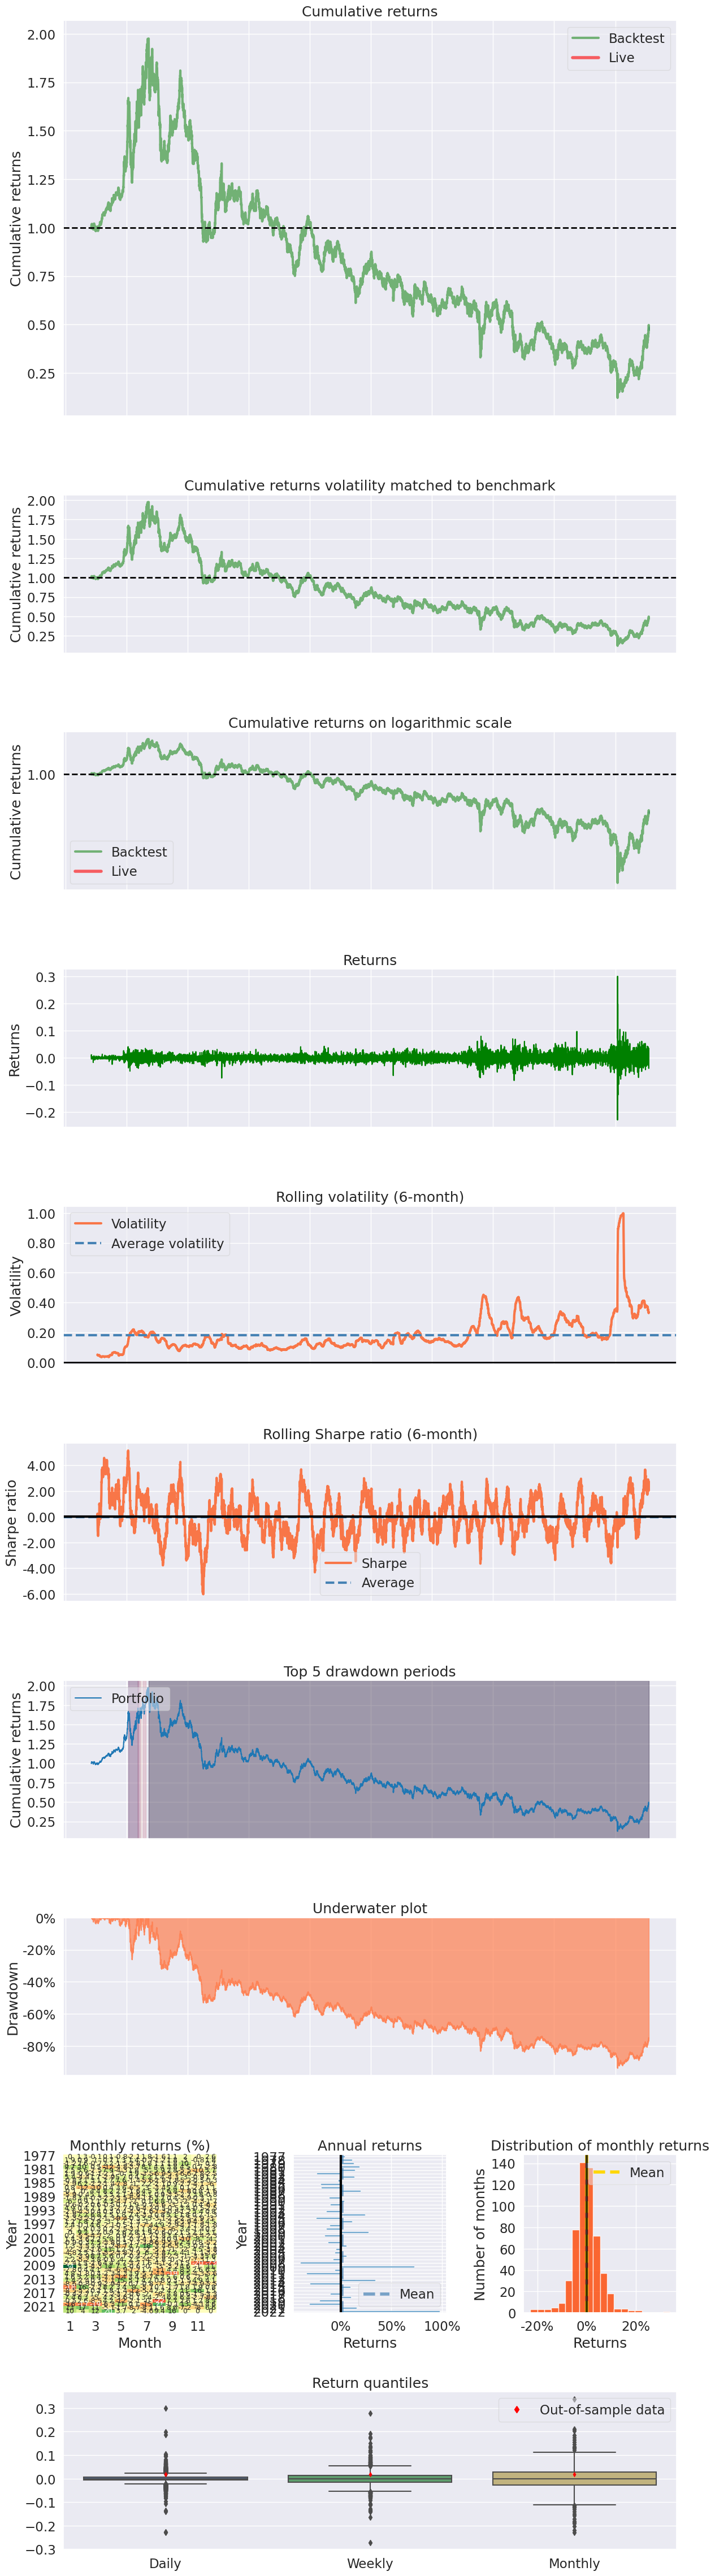

In [23]:
pf.create_returns_tear_sheet(bond_rets, live_start_date='2022-09-30')

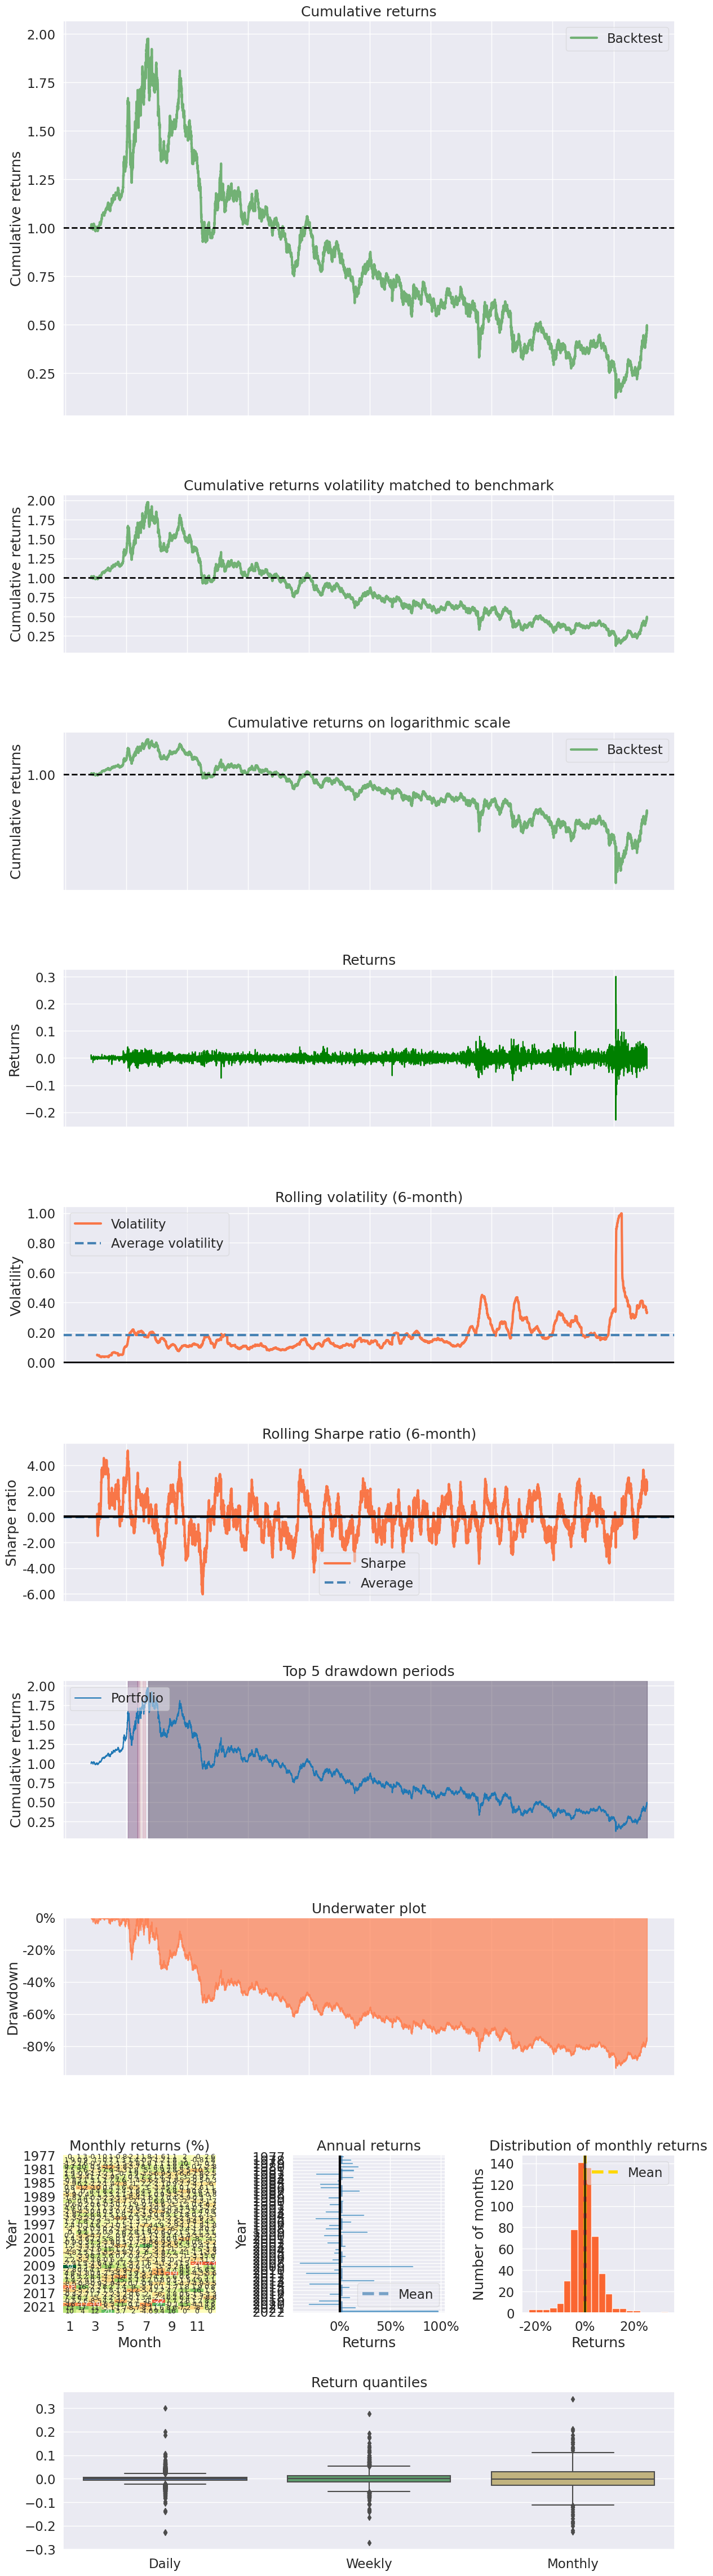

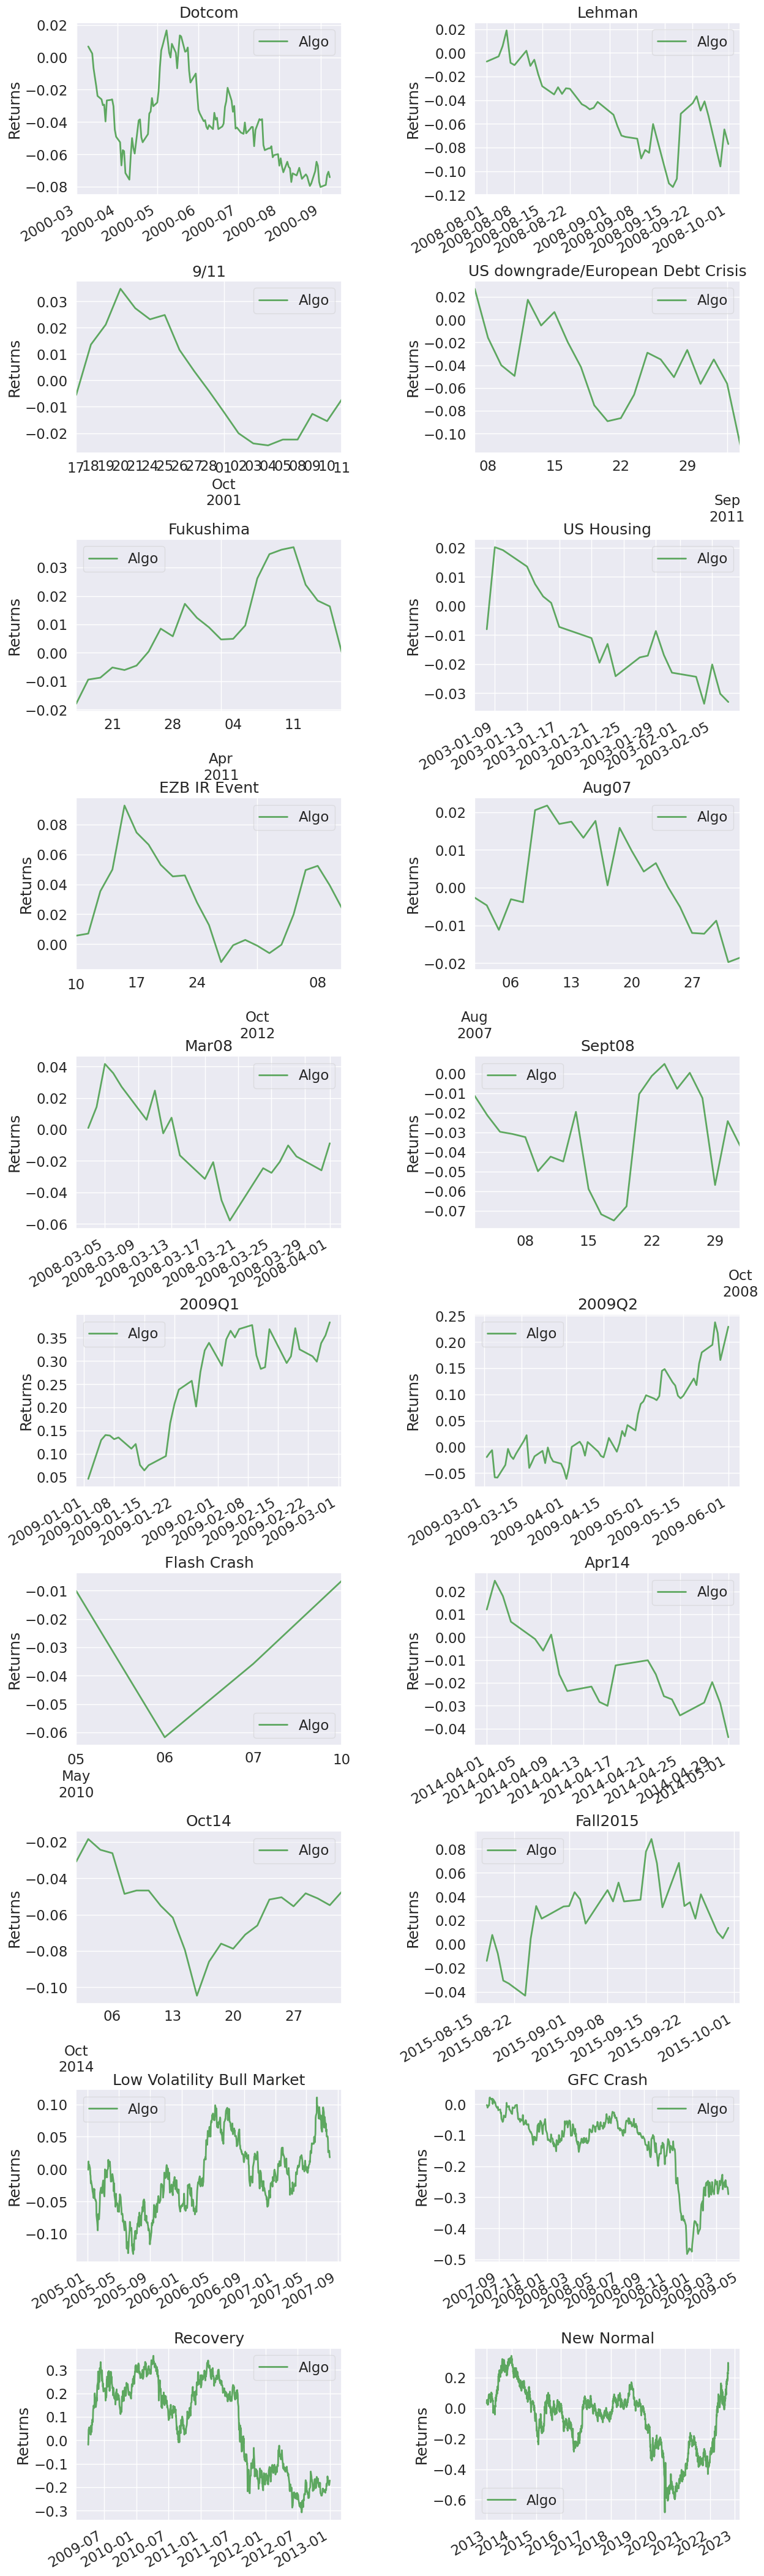

In [24]:
# The full tear sheet presents a selection of new tables and charts.  
# 5 worst drawdowns, with information as to peak/valley date and duration.
# Top 5 drawdown periods visualised on to of the cumulative returns.
# A simple plot showing the daily returns over time
# A selection of plots summarising the strategy's returns by breaking them down into: monthly returns(seperately per each year), annual returns, a histogram presenting the distribution of monthly returns and quantiles of returns expressed in different frequencies.

pf.create_full_tear_sheet(bond_rets)

In [25]:

# Join S&P500 returns, NASDQ100 returns and US Treasury Bond returns into a single Data frame with colums for each portfolios returns

combined_portfolio = pd.concat([spy_rets, ndx_rets, bond_rets], axis="columns", join="inner")

# Display a few rows
combined_portfolio.head()

Close     Close     Close
Date                                                   
1993-02-01 00:00:00+00:00  0.007112  0.013264  0.000000
1993-02-02 00:00:00+00:00  0.002119  0.005233  0.005548
1993-02-03 00:00:00+00:00  0.010571 -0.002398 -0.002759
1993-02-04 00:00:00+00:00  0.004184 -0.006082 -0.005532
1993-02-05 00:00:00+00:00 -0.000694 -0.014015 -0.002782

In [26]:

combined_portfolio_rets = combined_portfolio.dropna()
combined_portfolio_rets.head()

Close     Close     Close
Date                                                   
1993-02-01 00:00:00+00:00  0.007112  0.013264  0.000000
1993-02-02 00:00:00+00:00  0.002119  0.005233  0.005548
1993-02-03 00:00:00+00:00  0.010571 -0.002398 -0.002759
1993-02-04 00:00:00+00:00  0.004184 -0.006082 -0.005532
1993-02-05 00:00:00+00:00 -0.000694 -0.014015 -0.002782

In [27]:
# Create returns tear sheet of combined portfolio to backtest
# pf.create_returns_tear_sheet(combined_portfolio_rets, live_start_date='2022-09-30')
# pf.create_full_tear_sheet(combined_portfolio_rets)

In [28]:
#Renamed columns 
combined_portfolio_rets.columns = ["SP500", "NDASQ", "BOND"]
combined_portfolio_rets.head()
combined_portfolio_rets.tail()

SP500     NDASQ      BOND
Date                                                   
2022-09-26 00:00:00+00:00 -0.009893 -0.005051  0.023810
2022-09-27 00:00:00+00:00 -0.002553  0.001567  0.035425
2022-09-28 00:00:00+00:00  0.019676  0.019702 -0.038652
2022-09-29 00:00:00+00:00 -0.020889 -0.028628  0.003260
2022-09-30 00:00:00+00:00 -0.015464 -0.017337  0.019496

In [29]:
#Remove timestamp from date index
combined_portfolio_rets.index=combined_portfolio_rets.index.date
combined_portfolio_rets.head()

SP500     NDASQ      BOND
1993-02-01  0.007112  0.013264  0.000000
1993-02-02  0.002119  0.005233  0.005548
1993-02-03  0.010571 -0.002398 -0.002759
1993-02-04  0.004184 -0.006082 -0.005532
1993-02-05 -0.000694 -0.014015 -0.002782

Evaluate Riskiness of Stocks 


In [30]:
# Use the `std` function and multiply by the square root of the number of trading days in a year to get annualized volatility
volatility = combined_portfolio_rets.std() * np.sqrt(252)

# Sort values in ascending order
volatility = volatility.sort_values()

# Display the values
volatility

SP500    0.188937
BOND     0.253423
NDASQ    0.274917
dtype: float64

Explain volatility 

Set Portfolio Allocations/Weights and Calculate Portfolio Daily Returns
Set weights of existing portfolio and calculated future returns 

In [31]:
# Set weights for corresponding risk profile of stocks: SP500 and NSDAQ
weights = [0.50, 0.50, 0.00]

# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
portfolio_returns = combined_portfolio_rets.dot(weights)

# Diplay sample values
portfolio_returns.head()

1993-02-01    0.010188
1993-02-02    0.003676
1993-02-03    0.004087
1993-02-04   -0.000949
1993-02-05   -0.007355
dtype: float64

In [32]:

#pf.create_returns_tear_sheet(portfolio_returns)

 Calculate Cumulative Returns
 

In [33]:
# Use the `cumprod` function to calculate cumulative returns
cumulative_returns = (1 + portfolio_returns).cumprod()

# Display sample values
cumulative_returns.head()

1993-02-01    1.010188
1993-02-02    1.013901
1993-02-03    1.018045
1993-02-04    1.017079
1993-02-05    1.009598
dtype: float64

Plot Return of Portfolio Starting with Initial Investment of $100,000

<AxesSubplot:>

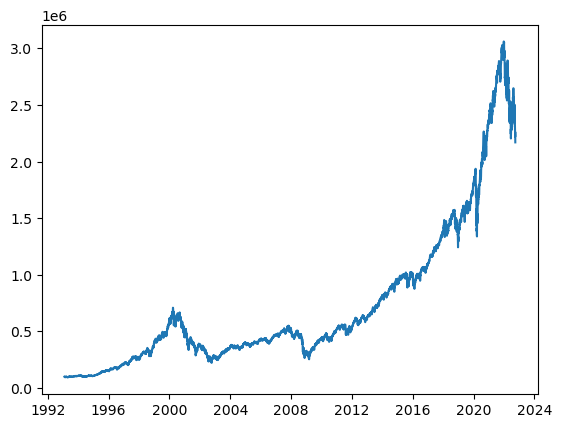

In [34]:
# Set initial investment
initial_investment = 100000

# Compute cumulative returns
cumulative_profit = initial_investment * cumulative_returns

# Plot the returns of the investment
cumulative_profit.plot()

In [35]:
# # Reorganize the DataFrame
# # Separate ticker data
# xx = df_stock_data[df_stock_data['symbol']=='xx'].drop('symbol', axis=1)
# xx = df_stock_data[df_stock_data['symbol']=='xxx'].drop('symbol', axis=1)
# xx = df_stock_data[df_stock_data['symbol']=='xxx'].drop('symbol', axis=1)

# # Concatenate the ticker DataFrames
# df_stock_data = pd.concat([xx xx xx],axis=1, keys=['xx','xx'])


# # Display sample data
# df_stock_data.head()

# portfolio_df = pd.concat([spy_hist, ndx_hist, bond_hist])
# portfolio_df.head()

In [37]:
portfolio_returns


1993-02-01    0.010188
1993-02-02    0.003676
1993-02-03    0.004087
1993-02-04   -0.000949
1993-02-05   -0.007355
                ...   
2022-09-26   -0.007472
2022-09-27   -0.000493
2022-09-28    0.019689
2022-09-29   -0.024759
2022-09-30   -0.016400
Length: 7450, dtype: float64

In [36]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 500

MC_fiveyear = MCSimulation(
    portfolio_data = pd.DataFrame(portfolio_returns),
    weights = [.60,.40, .00],
    num_simulation = num_sims,
    num_trading_days = 252*5
)

IndexError: Too many levels: Index has only 1 level, not 2

Comment on the above plot

Five Years Investment Plan


In [ ]:
portfolio_df = pd.concat([spy_hist, ndx_hist, bond_hist])

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()